#### Malls  data 
-  file  reading

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path   =  r"C:\Users\admin\Downloads\Mall_Customers.csv"

In [4]:
df  =  pd.read_csv(path)

In [5]:
### Basic  checks
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

##### fit  model  on  the basis of  annual  income  and  spending score

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
#  data  
x =  df[[ 'Annual Income (k$)' ,'Spending Score (1-100)' ]]

In [10]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
x.columns  =  ['Annual Income' , 'Spending Score ']

In [12]:
x.columns

Index(['Annual Income', 'Spending Score '], dtype='object')

#### EDA - data visualization

<Axes: xlabel='Annual Income', ylabel='Spending Score '>

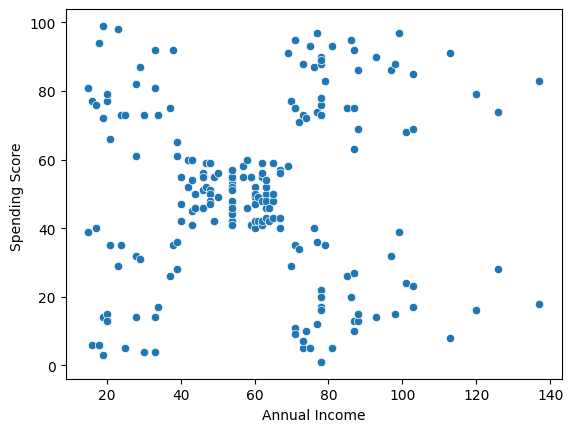

In [13]:
sns.scatterplot(data  = x  ,  x  = 'Annual Income'  , y  =  'Spending Score ' )

#### create pipeline

In [14]:
from  sklearn.pipeline  import Pipeline
from  sklearn.preprocessing  import StandardScaler  
from sklearn.impute  import SimpleImputer

In [15]:
num_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy =  'mean')) ,
                          ('scaler' , StandardScaler())])

In [16]:
#  apply  pipeline  to data
x_scaled  =  num_pipeline.fit_transform(x)

In [17]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [18]:
## convert  in dataframe
x_scaled =  pd.DataFrame(x_scaled , )

In [19]:
num_pipeline.get_feature_names_out()

array(['Annual Income', 'Spending Score '], dtype=object)

In [20]:
x_scaled.columns  = x.columns

In [21]:
x_scaled.columns

Index(['Annual Income', 'Spending Score '], dtype='object')

In [22]:
x_scaled.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


<Axes: xlabel='Annual Income', ylabel='Spending Score '>

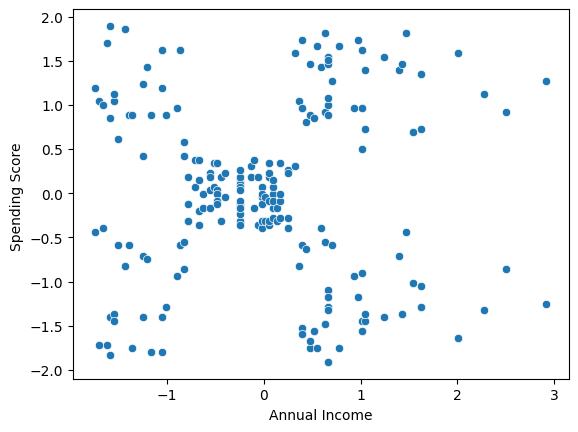

In [23]:
sns.scatterplot(data = x_scaled  , 
                x  = 'Annual Income' ,
                y = 'Spending Score ')

In [24]:
###  kmeans model fitting
from sklearn.cluster  import KMeans

In [25]:
kmean  =  KMeans(n_clusters  =4 )

In [26]:
kmean.fit(x_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [27]:
lb =  kmean.labels_
lb

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

<Axes: xlabel='Annual Income', ylabel='Spending Score '>

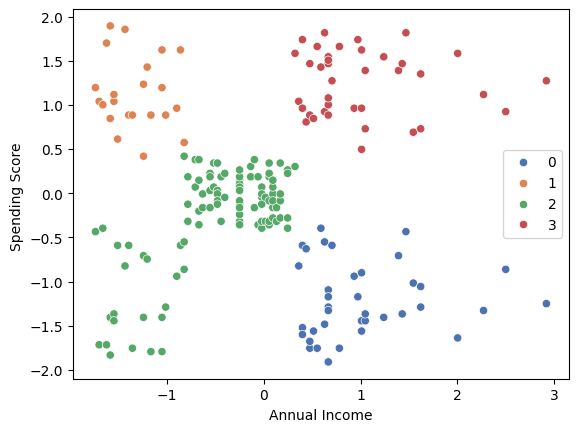

In [28]:
sns.scatterplot(data = x_scaled  , 
                x  = 'Annual Income' ,
                y = 'Spending Score ' , hue  =  lb  , palette =  'deep')

In [29]:
kmean.inertia_

109.22822707921344

##### use elbow  plot

In [30]:
k  =  range(2  , 15)
inertia  =  []
for  i in range(2, 15):
    kmean  =  KMeans(n_clusters  =  i)
    kmean.fit(x_scaled)
    inertia.append(kmean.inertia_)

In [31]:
inertia

[270.8923594673905,
 157.7040081503594,
 109.22822707921344,
 65.57885579985049,
 55.06779591451967,
 52.4689062729593,
 38.92171054553679,
 34.65794342064214,
 29.076176851244277,
 27.393283409434524,
 24.79381442368119,
 21.321079564116772,
 20.400165994953568]

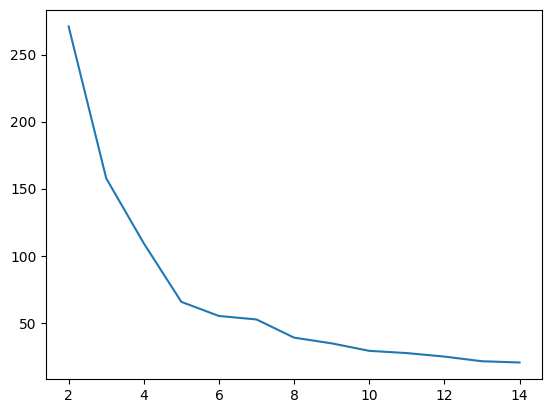

In [32]:
plt.plot(k ,  inertia)

In [61]:
##  yellobrick

In [62]:
%pip install  yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from  yellowbrick.cluster.elbow import kelbow_visualizer

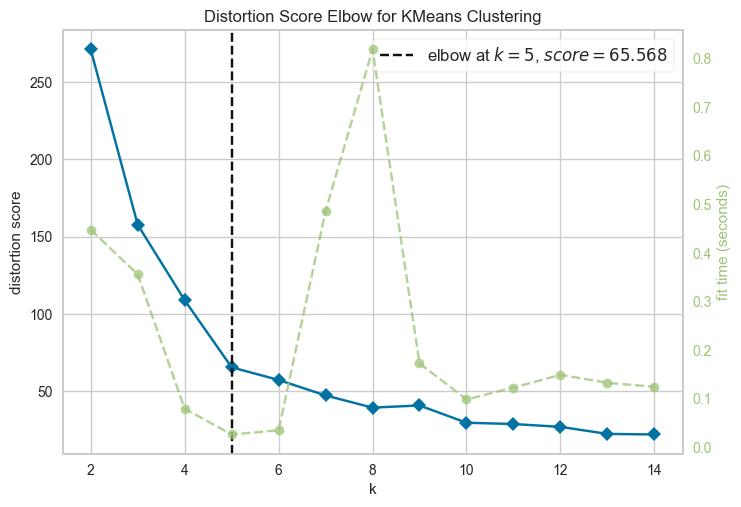

,estimator,KMeans(n_clusters=14)
,ax,<Axes: title=...ortion score'>
,k,"range(2, 15)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,14
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [35]:
kelbow_visualizer(KMeans() ,  
                x_scaled  , 
                k  =  range(2 , 15))

In [66]:
%pip install setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
